## How to Check if Time Series Data is Stationary with Python

### Reference : https://machinelearningmastery.com/time-series-data-stationary-python/

### Energy Production data : Not Seasonal

In [13]:
e_data = pd.read_csv("data/IPG2211A2N.csv",index_col=0)
e_data.index = pd.to_datetime(e_data.index)
e_data.columns = ['Energy Production']


<AxesSubplot:xlabel='DATE'>

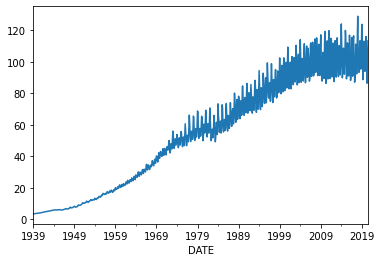

In [16]:
e_data['Energy Production'].plot()

### Female Births : Seasonal

/Users/nsurawee/Documents/v_env/p3-8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

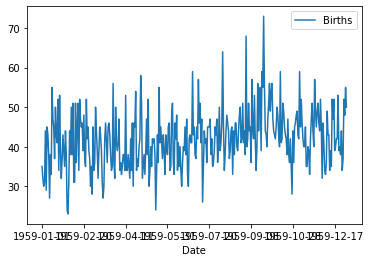

In [20]:
from pandas import read_csv

b_data = read_csv('data/daily-total-female-births.csv', header=0, index_col=0)
b_data.plot()


## Augmented Dickey-Fuller test

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [14]:
### Energy Production data : Not Seasonal

test_result=adfuller(e_data['Energy Production'])
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
for value,label in zip(test_result,labels):
    print(label+' : '+str(value) )

ADF Test Statistic : -0.7209808933942661
p-value : 0.8412399105457979
#Lags Used : 22
Number of Observations Used : 956


In [23]:
### Birth data : Seasonal

test_result=adfuller(b_data['Births'])
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
for value,label in zip(test_result,labels):
    print(label+' : '+str(value) )

ADF Test Statistic : -4.808291253559765
p-value : 5.2434129901498554e-05
#Lags Used : 6
Number of Observations Used : 358


# Autocorrelation¶

https://www.mikulskibartosz.name/finding-seasonality-in-time-series-using-autocorrelation-plot/

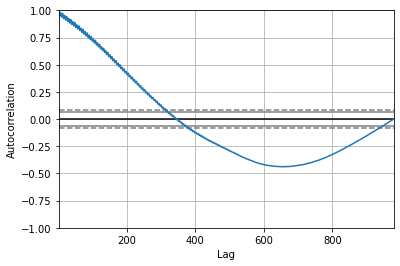

In [15]:
### Energy Production data : Not Seasonal
#from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
autocorrelation_plot(e_data['Energy Production'])
plt.show()

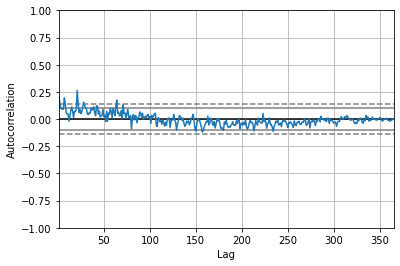

In [22]:
### Birth data : Seasonal
autocorrelation_plot(b_data['Births'])
plt.show()